In [1]:
import os
import random
import warnings
from IPython.display import display, HTML

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

from auto_categorical_features_transformer import create_categorical_feature_transformations_report, CategoricalTransformationMethods

In [2]:
warnings.filterwarnings("ignore")

In [3]:
def _load_insurance_charges_dataset():
    dataset_df = pd.read_csv('./datasets/insurance.dataset.csv')
    y = (dataset_df['charges'] > 25_000).astype(int)
    X = dataset_df.drop('charges', axis=1)
    return X, y

In [4]:
X, y = _load_insurance_charges_dataset()

transformations evaluation: 100%|██████████████████████████████████████████████████████████████████████| 16/16 [00:06<00:00,  2.64it/s]


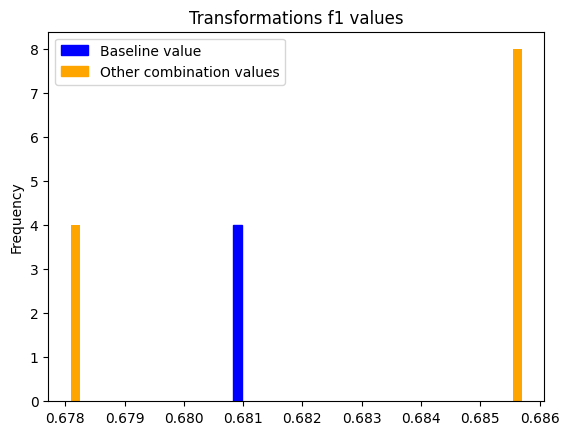

In [5]:
one_hot_results = create_categorical_feature_transformations_report(
    X, y,
    transformation_method=CategoricalTransformationMethods.OneHot,
    return_rich_table=True,
    verbose=True
)
one_hot_results.summary_table

transformations evaluation: 100%|██████████████████████████████████████████████████████████████████████| 16/16 [00:05<00:00,  2.87it/s]


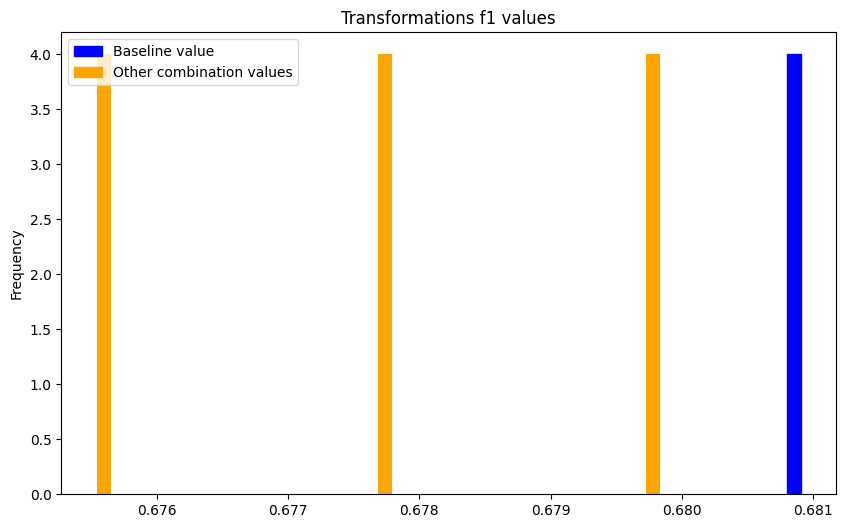

In [6]:
woe_results = create_categorical_feature_transformations_report(
    X, y,
    transformation_method=CategoricalTransformationMethods.WeightOfEvidence,
    return_rich_table=True,
    verbose=True
)
woe_results.summary_table

transformations evaluation: 100%|██████████████████████████████████████████████████████████████████████| 16/16 [00:04<00:00,  3.54it/s]


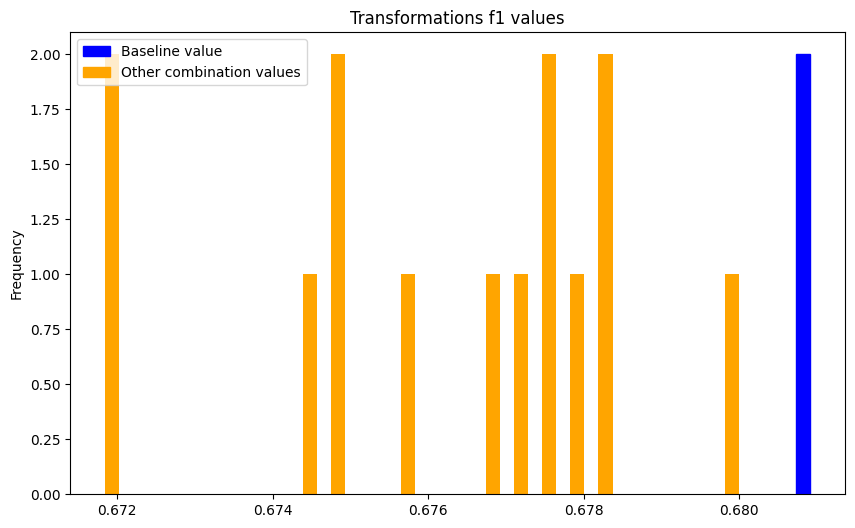

In [7]:
loo_results = create_categorical_feature_transformations_report(
    X, y,
    transformation_method=CategoricalTransformationMethods.LeaveOneOut,
    return_rich_table=True,
    verbose=True
)
loo_results.summary_table

In [8]:
loo_results

CategoricalTransformationResults(transformation_candidate_features=('region', 'sex', 'smoker', 'children'), baseline_evaluation_results=transformed_columns          []
f1                     0.680907
f1_std                  0.04311
accuracy               0.881886
accuracy_std           0.020039
Name: 0, dtype: object, summary_table=<datapane.client.api.report.blocks.DataTable object at 0x13ab4a820>)